# **Predictive Model Markup Language (PMML)**

- libreria per esportare i file .pmml: https://github.com/jpmml/sklearn2pmml
- libreria per importare i file .pmml: https://github.com/autodeployai/pypmml


In [ ]:
# installo sklearn2pmml
!pip install sklearn2pmml

#installo pypmml
!pip install pypmml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.9 MB/s eta 0:00:00
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.98.1-py3-none-any.whl size=7051306 sha256=29c88364cb8ef663ac7ff6f211ca99434d933832b2689451af6553de237690c7
  Stored in directory: /root/.cache/pip/wheels/7c/44/b2/48ffeecd45f409ea55fb0c10fa56023efb8432cb9deb679a82
Successfully built sklearn2pmml
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 32.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pypmml: filename=pypmml-0.9.17-py3-none-any.whl size=14215033 sha256=ec11218d42fbc61734e028f59f75023458d3d25e7637b1b37c39a6228807fef9
  Stored in directory: /root/.cache/pip/wheels/8c/74/f1/946a04acaa6de2e9df0f02739511aba5a7aac52383c52ac900
Successfully built pypmml


# **SALVARE UN MODELLO ADDESTRATO**

In [ ]:

import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline



# sklearn to pmml
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/boston_housing/BostonHousing.csv")
display(df)

,Unnamed: 0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,1,0.02731,12.5,7.07,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,2,0.02729,12.5,7.07,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,3,0.03237,12.5,2.18,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,4,0.06905,12.5,2.18,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,12.5,11.93,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,502,0.04527,12.5,11.93,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,503,0.06076,12.5,11.93,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,504,0.10959,12.5,11.93,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [ ]:

# sklearn2pmml vuole feature e labels come dataframe
# con i nomi associati alle colonne
X = df.drop("MEDV", axis=1)
Y = df["MEDV"]



In [ ]:


# =====================
# [1] SPLIT
# =====================
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)




# =====================
# [2] ADDESTRAMENTO
# =====================
poly_degree         = 3
ridge_alpha         = 10
ridge_fit_intercept = True

slc   = StandardScaler()
poly  = PolynomialFeatures(degree=poly_degree)
ridge = Ridge(alpha=ridge_alpha, fit_intercept=ridge_fit_intercept)

pmml_pipe = PMMLPipeline(steps=[ ("slc", slc),
                            ("poly", poly),
                            ("ridge", ridge)] )

pmml_pipe.fit(X_train, Y_train)

print()



# ===========
# [3] OUT
# ============
sklearn2pmml(pmml_pipe, "housing.pmml", with_repr = True)




# **CARICARE UN MODELLO ADDESTRATO**



In [ ]:
# è preferibile usare un dataframe per passare i dati
display(X_test)

,Unnamed: 0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
64,64,0.01951,17.5,1.38,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05
100,100,0.14866,12.5,8.56,0.5200,6.727,79.9,2.7778,5,384,20.9,394.76,9.42
400,400,25.04610,12.5,18.10,0.6930,5.987,100.0,1.5888,24,666,20.2,396.90,26.77
485,485,3.67367,12.5,18.10,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58
454,454,9.51363,12.5,18.10,0.7130,6.728,94.1,2.4961,24,666,20.2,6.68,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,314,0.36920,12.5,9.90,0.5440,6.567,87.3,3.6023,4,304,18.4,395.69,9.28
287,287,0.03871,52.5,5.32,0.4050,6.209,31.3,7.3172,6,293,16.6,396.90,7.14
384,384,20.08490,12.5,18.10,0.7000,4.368,91.2,1.4395,24,666,20.2,285.83,30.63
108,108,0.12802,12.5,8.56,0.5200,6.474,97.1,2.4329,5,384,20.9,395.24,12.27


In [ ]:
from pypmml import Model

# ==========
# [1] IN
# ==========
model = Model.fromFile('housing.pmml')

# ===============
# [2] PREDICT
# ===============
Y_pred = model.predict(X_test)






pandas.core.frame.DataFrame

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(" MSE:", mse, "  R2:", r2)

 MSE: 20.30221216018618   R2: 0.7797545963152825


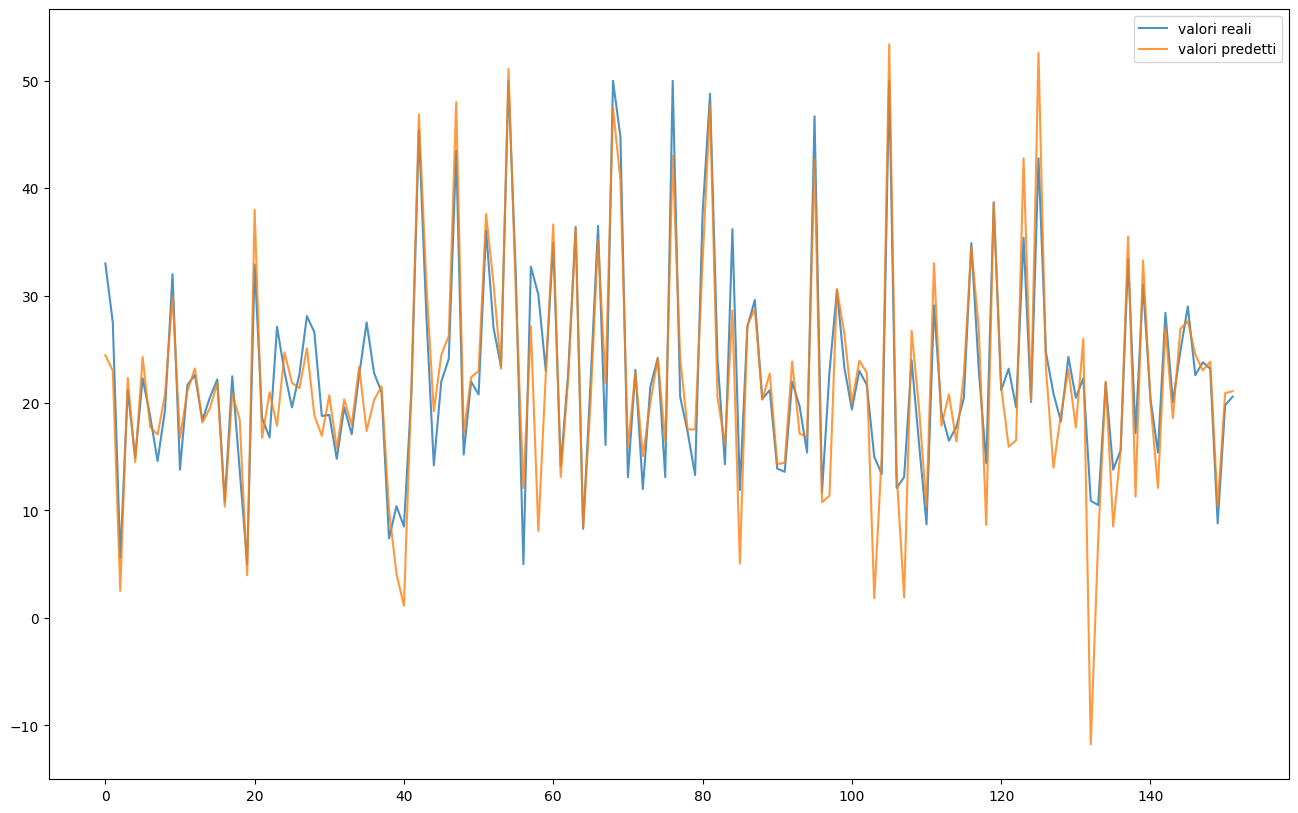

In [ ]:
import matplotlib.pyplot as plt


# andamento valori reali e valori predetti
plt.figure(figsize=(16, 10))
plt.plot(np.arange(Y_test.size), Y_test,  alpha=0.8, label="valori reali")
plt.plot(np.arange(Y_pred.size), Y_pred, alpha=0.8, label="valori predetti")
plt.legend()
plt.show()

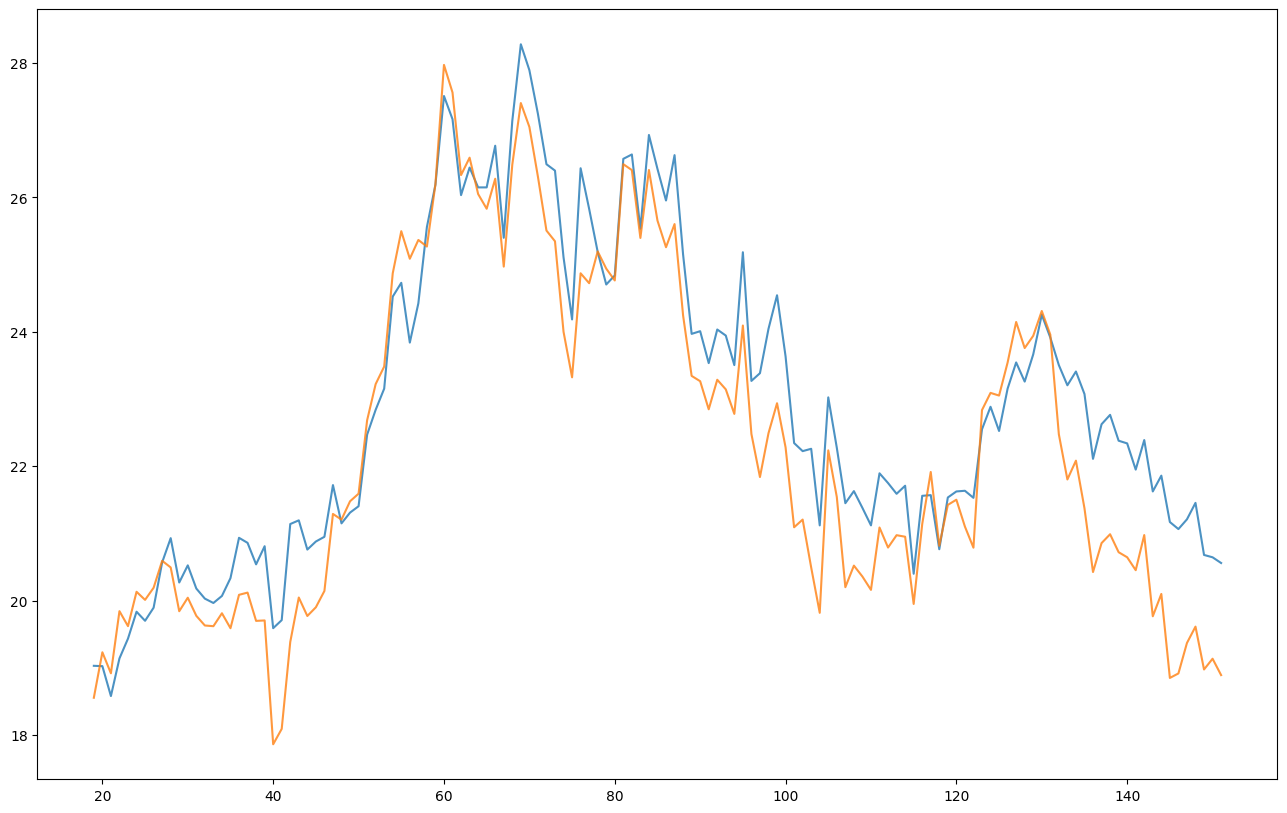

In [ ]:
# andamento media mobile valori reali e valori predetti
r = 20
maverage_y_test = Y_test.rolling(r).mean()
maverage_y_pred = Y_pred.rolling(r).mean()

plt.figure(figsize=(16, 10))
plt.plot(np.arange(maverage_y_test.size), maverage_y_test,  alpha=0.8, label="valori reali")
plt.plot(np.arange(maverage_y_pred.size), maverage_y_pred, alpha=0.8, label="valori predetti")
plt.show()

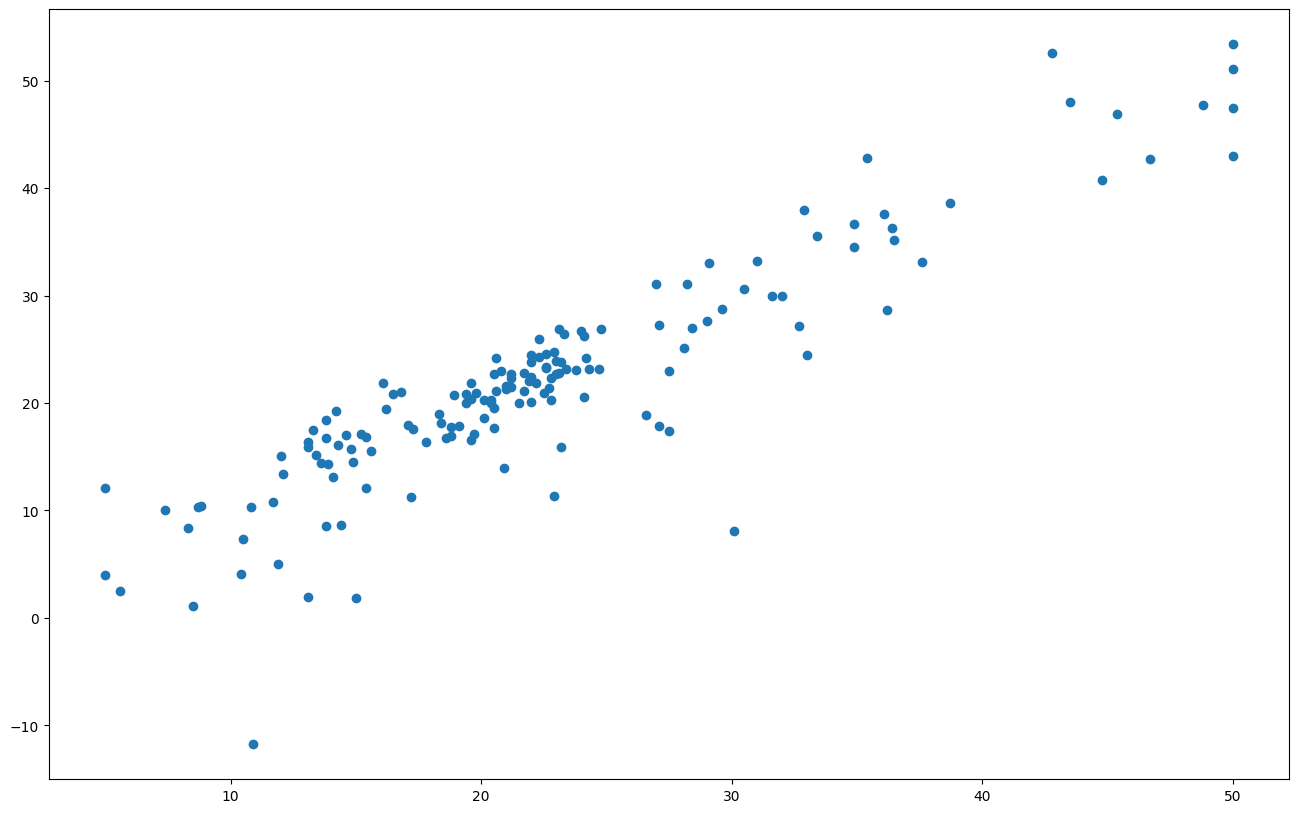

In [ ]:
# varianza tra valori reali e valori predetti
plt.figure(figsize=(16, 10))
plt.scatter(Y_test, Y_pred)
plt.show()